In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys
sys.path.append("..")

from scripts.data_prep import preprocess_dataset

In [3]:
DATA_DIR = Path("../data")

## Data Preprocessing

In [4]:
data = pd.read_csv(DATA_DIR / "WELFake_Dataset.csv", index_col=0)

train_df, test_df = preprocess_dataset(data, test_size=0.2)

clean_df = pd.concat([train_df, test_df], axis=0)
clean_df

,title,text,label
45905,Exclusive: Foreign Isis Fighters Defend Mosul ...,\nForeign fighters for Isis are choosing to ...,1
37291,JUDGE JEANINE UNLOADS On Hillary: “How Did You...,You don t want to miss a second of Judge Jeani...,1
46730,Gunman attacks Saudi security forces at gate o...,RIYADH (Reuters) - Two Saudi guards were shot ...,0
66327,Indian Software Mogul: Hire Americans Now Beca...,A leading Indian software entrepreneur says In...,0
58329,Rep. Diaz-Balart: Liberals Against Trump Who F...,Florida Congressman Mario attacked the “doub...,0
...,...,...,...
33088,France's Macron unveils plan to curb violence ...,PARIS (Reuters) - French President Emmanuel Ma...,0
31762,HILLARY CLINTON Abruptly Cancels Fundraiser In...,Zero Hedge reported:If there was a time Hillar...,1
45631,"German SPD considers propping up Merkel, but o...",BERLIN (Reuters) - Germany s Social Democrats ...,0
47058,"House Republicans repeal Obamacare, hurdles aw...",WASHINGTON (Reuters) - The U.S. House of Repre...,0


## Data Exploration

In [25]:
label_counts = clean_df["label"].value_counts()
print(label_counts, end="\n\n")
print(label_counts / label_counts.sum())

label
1    35766
0    35027
Name: count, dtype: int64

label
1    0.505219
0    0.494781
Name: count, dtype: float64


In [26]:
title_lens = clean_df["title"].str.split().str.len()
text_lens = clean_df["text"].str.split().str.len()

In [27]:
title_lens_cdf = title_lens.value_counts(normalize=True).sort_index().cumsum()
text_lens_cdf = text_lens.value_counts(normalize=True).sort_index().cumsum()

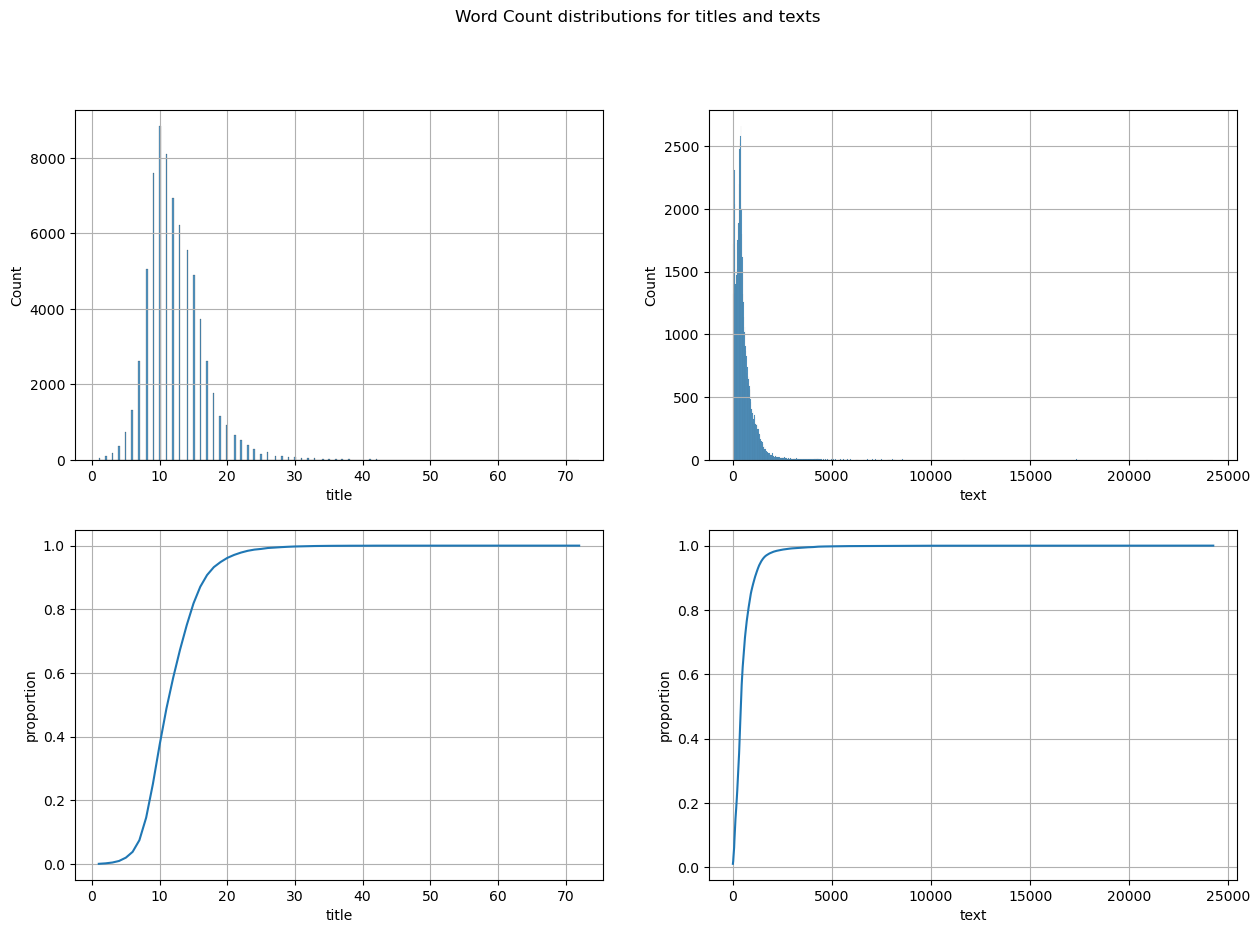

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Word Count distributions for titles and texts")


sns.histplot(title_lens, ax=axs[0, 0])
sns.histplot(text_lens, ax=axs[0, 1])
# sns.histplot(text_lens.loc[text_lens < 5000], ax=axs[0, 1])

sns.lineplot(x=title_lens_cdf.index, y=title_lens_cdf, ax=axs[1, 0])
sns.lineplot(x=text_lens_cdf.index, y=text_lens_cdf, ax=axs[1, 1])

for ax in axs.flatten():
    ax.grid(True)

In [31]:
pd.DataFrame({"title_wordcount": title_lens.describe(), "text_wordcount": text_lens.describe()})

,title_wordcount,text_wordcount
count,70793.000000,70793.000000
mean,12.246225,550.285904
std,4.122556,627.118215
min,1.000000,1.000000
25%,9.000000,239.000000
50%,12.000000,403.000000
75%,14.000000,675.000000
max,72.000000,24234.000000


In [32]:
from collections import Counter

word_freqs = Counter()
clean_df["text"].str.lower().str.split().apply(word_freqs.update)

words_df = pd.DataFrame(word_freqs.items(), columns=["word", "count"]).sort_values("count")
words_df

,word,count
350509,“plastics.,1
459805,chhin,1
459804,uon,1
459803,"fas,",1
459801,bleacher-style,1
...,...,...
27,a,870941
13,and,897691
8,of,987362
32,to,1095842
